# Rent prediction

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis


In [15]:
rent_df = pd.read_csv("C:/Users/asus/OneDrive/Desktop/House_Rent_Dataset.csv")
rent_df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18-05-2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13-05-2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16-05-2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04-07-2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09-05-2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,18-05-2022,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,15-05-2022,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,10-07-2022,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,06-07-2022,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [16]:
#checking the shape of data
rent_df.shape

(4746, 12)

In [17]:
#checking the columns
rent_df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [18]:
#imformation about the data set
rent_df.info()
print("--------------------------------------------------------------------")
rent_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
--------------------------------------------------------------------


,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [19]:
#checking if there is any null value or not
rent_df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [20]:
#checking if there is any duplicate values or not
rent_df.duplicated().sum()

0

In [21]:
#checking mean, median, maximun and minimum house rent
print("Mean of house rent =", round(rent_df["Rent"].mean()))
print("Median of house rent =", round(rent_df["Rent"].median()))
print("Higest house rent =", round(rent_df["Rent"].max()))
print("Lowest house rent =", round(rent_df["Rent"].min()))

Mean of house rent = 34993
Median of house rent = 16000
Higest house rent = 3500000
Lowest house rent = 1200


In [43]:
# Top 10 higest rent acording to city, area type, area locality, BHK..etc 
rent_df[["Rent", "City", "Area Type", "Area Locality", "BHK", "Size", "Furnishing Status", "Tenant Preferred"]].sort_values(by=("Rent"),ascending = False)[:10]

,Rent,City,Area Type,Area Locality,BHK,Size,Furnishing Status,Tenant Preferred
1837,3500000,Bangalore,Carpet Area,Marathahalli,3,2500,Semi-Furnished,Bachelors
1001,1200000,Mumbai,Carpet Area,Juhu,4,5000,Semi-Furnished,Bachelors/Family
827,1000000,Mumbai,Carpet Area,"Raheja Artesia, Worli",4,3064,Semi-Furnished,Family
1329,850000,Mumbai,Carpet Area,Breach Candy,4,3200,Furnished,Bachelors/Family
1459,700000,Mumbai,Carpet Area,"Lady Ratan Tower, Worli",4,3200,Furnished,Bachelors/Family
1484,680000,Mumbai,Carpet Area,Khar West,4,1962,Semi-Furnished,Bachelors/Family
1319,650000,Mumbai,Carpet Area,Khar West,5,3000,Semi-Furnished,Bachelors/Family
726,600000,Mumbai,Carpet Area,"Mount Marry, Bandra West",4,2500,Semi-Furnished,Bachelors/Family
1384,600000,Mumbai,Carpet Area,Bandra West,5,4500,Furnished,Bachelors
792,600000,Mumbai,Carpet Area,Bandra East,5,3200,Semi-Furnished,Bachelors/Family


In [46]:
# Top 10 Lowest rent acording to city, area type, area locality, BHK..etc 
rent_df[["Rent", "City", "Area Type", "Area Locality", "BHK", "Size", "Furnishing Status", "Tenant Preferred"]].sort_values(by=("Rent"),ascending = True)[:10]


,Rent,City,Area Type,Area Locality,BHK,Size,Furnishing Status,Tenant Preferred
4076,1200,Hyderabad,Carpet Area,"Uppal, NH 2 2",3,2100,Furnished,Bachelors/Family
285,1500,Kolkata,Super Area,Santoshpur,1,200,Semi-Furnished,Bachelors/Family
471,1800,Kolkata,Super Area,Shyam Bazar,1,500,Semi-Furnished,Bachelors/Family
2475,2000,Delhi,Super Area,Ram Nagar,2,60,Unfurnished,Bachelors/Family
146,2200,Kolkata,Super Area,Behala silpara,2,550,Furnished,Bachelors/Family
506,2200,Kolkata,Super Area,Baranagar,1,700,Unfurnished,Bachelors/Family
4220,3000,Hyderabad,Super Area,Rhoda Mistri Nagar,1,80,Semi-Furnished,Bachelors/Family
221,3000,Kolkata,Super Area,Barasat,1,200,Unfurnished,Bachelors/Family
3378,3000,Chennai,Super Area,Mangadu,1,350,Unfurnished,Bachelors/Family
306,3000,Kolkata,Super Area,Hatiara,1,500,Semi-Furnished,Bachelors/Family


In [23]:
# 5 lowest rents present in data sets
rent_df["Rent"].sort_values(ascending = True).head()

4076    1200
285     1500
471     1800
2475    2000
146     2200
Name: Rent, dtype: int64

In [52]:
ax = rent_df[["Furnishing Status", "City", "BHK"]].value_counts()
ax

Furnishing Status  City       BHK
Semi-Furnished     Bangalore  2      283
                   Chennai    2      243
Unfurnished        Hyderabad  2      219
                   Chennai    2      200
                   Kolkata    2      175
                                    ... 
                   Delhi      5        1
Semi-Furnished     Chennai    6        1
Furnished          Hyderabad  6        1
Semi-Furnished     Kolkata    6        1
Unfurnished        Mumbai     5        1
Length: 85, dtype: int64

In [48]:
#Number of House in Each City which is Available for Rent 
for_rent = rent_df[["City", "BHK"]].value_counts()
for_rent


City       BHK
Chennai    2      484
Hyderabad  2      446
Bangalore  2      431
Mumbai     2      374
           1      287
Kolkata    2      276
Bangalore  1      270
Delhi      2      254
Hyderabad  3      243
Mumbai     3      227
Chennai    3      220
           1      163
Bangalore  3      162
Delhi      1      160
           3      154
Hyderabad  1      145
Kolkata    1      142
           3       92
Mumbai     4       73
Delhi      4       36
Hyderabad  4       26
Bangalore  4       23
Chennai    4       20
Kolkata    4       11
Mumbai     5       11
Hyderabad  6        5
           5        3
Kolkata    5        2
Chennai    5        2
           6        2
Kolkata    6        1
Delhi      5        1
dtype: int64

In [49]:
#furnishing status
furnished_status = rent_df[["Furnishing Status", "City"]].value_counts()
furnished_status

Furnishing Status  City     
Semi-Furnished     Bangalore    584
                   Chennai      448
                   Hyderabad    402
                   Mumbai       397
Unfurnished        Chennai      362
                   Hyderabad    355
                   Mumbai       336
                   Kolkata      321
Semi-Furnished     Delhi        278
Furnished          Mumbai       239
Unfurnished        Delhi        230
                   Bangalore    211
Semi-Furnished     Kolkata      142
Furnished          Hyderabad    111
                   Delhi         97
                   Bangalore     91
                   Chennai       81
                   Kolkata       61
dtype: int64

In [51]:
#types of teanant preferred
teannt_preferred = rent_df[["Tenant Preferred", "City", "BHK"]].value_counts()
teannt_preferred

Tenant Preferred  City       BHK
Bachelors/Family  Hyderabad  2      361
                  Chennai    2      359
                  Bangalore  2      344
                  Mumbai     2      231
                  Bangalore  1      227
                                   ... 
Bachelors         Delhi      5        1
                  Chennai    6        1
                  Hyderabad  5        1
                             4        1
Bachelors/Family  Chennai    6        1
Length: 85, dtype: int64

# Data visualization (Pie Chart)

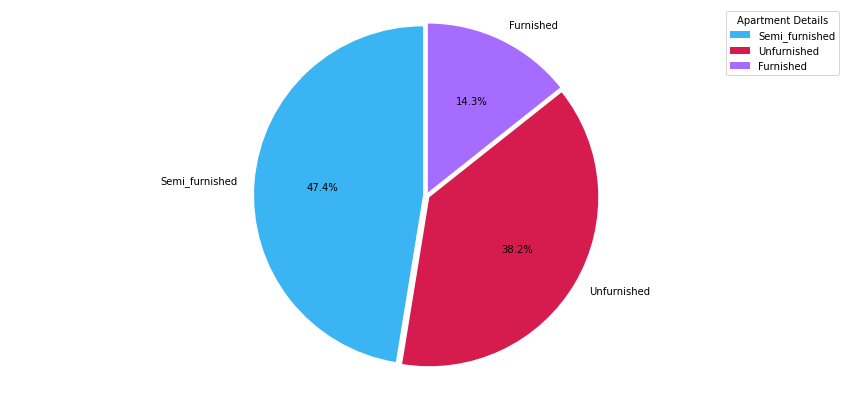

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,7))
mylabels = ["Semi_furnished", "Unfurnished", "Furnished"]
myexplode = (0.02, 0.02, 0.02)
my_colors = ('#3AB4F2', '#D61C4E', '#A66CFF')
plt.pie(furnished_status, startangle=90, explode = myexplode, colors = my_colors, labels=mylabels, autopct = "%1.1f%%")
plt.legend(title = "Apartment Details", loc="best")  #always print "legend" then print "show"
plt.axis('equal')  #legend ko size m laane ke liye
plt.show()


#function we use here
# figure (size adjust krne ke liye)
# explode (seperate krne ke liye)
# startangle=90 (straight krne ke liye)
# autopct (to distribute percentage)
# plt.axis('equal')
#we can use shadow = True to add shadow in border


# WordCloud on Area Locality

In [29]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install stop-words

Note: you may need to restart the kernel to use updated packages.


In [31]:
from stop_words import get_stop_words

In [32]:
from wordcloud import WordCloud, STOPWORDS

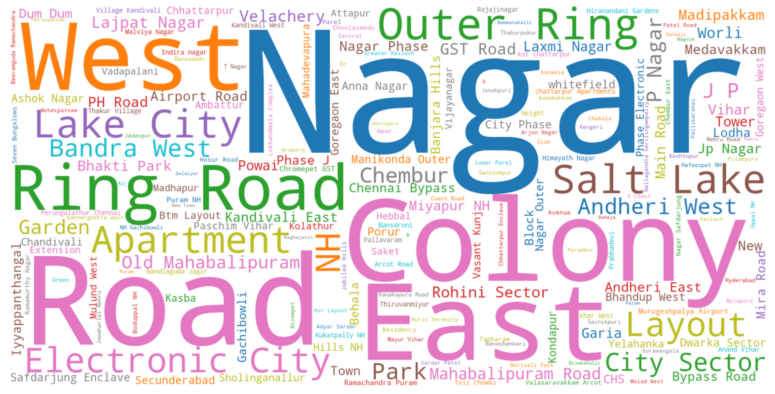

In [33]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(Company for Company in rent_df["Area Locality"])
word_cloud = WordCloud(width = 1600,
                       height = 800,
                       colormap = 'tab10',
                       background_color = "white").generate(text)
plt.figure(figsize = (35, 7))
plt.imshow(word_cloud, interpolation="gaussian")
plt.axis("off")
plt.show()

In [34]:
rent_df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

# Conclusion

In [53]:
# Rent availabe city wise
# Average rent, Maximim rent, minimum rent (city, area, BHK..etc) wise
# Top 10 cities with highest rent
# Top 10 cities with lowest rent
# How many are Furnished, unfurished, semi-furnished (city, area, BHK) wise
# Tenant prefereance to rent according to city wise, area, BHK, furnished status.
